In [1]:
import networkx as nx
import localgraphclustering as lgc
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [44]:
def ncpplot(N,rholist=[1e-2,1e-3,1e-4]):
    ncp = lgc.NCPData(lgc.GraphLocal().from_networkx(N)).approxPageRank(rholist=rholist)
    lgc.NCPPlots(ncp).cond_by_size()
    return ncp

def ncpplotline(ax,N,name,rholist=[1e-2,1e-3,1e-4],nbins=20):
    ncp = lgc.NCPData(lgc.GraphLocal().from_networkx(N)).approxPageRank(rholist=rholist)
    linedata = lgc.NCPPlots(ncp).feature_by_group_min_line(
            "output_cond","output_sizeeff", ax=ax, label=name, nbins=nbins)
    ax.loglog()
    return ncp
    
def matrix2dict(A,G):
    return {v:list(A[i]) for i,v in enumerate(G.nodes())}

def fiedler_view(N):
    F = lgc.algorithms.eig2_nL(lgc.GraphLocal().from_networkx(N),dim=2)[0]
    return nx.draw(N,matrix2dict(F,N),node_size=12, width=0.5, alpha=0.5), F


def ncpsetview(N,pos,ax=None,ncp=None,nbins=20,rholist=[1e-2,1e-3,1e-4]):
    
    fig,axs = plt.subplots(4,5, figsize=(8,8))
    axs = axs.flatten()
    
    # We need to be a bit hacky here because feature_by_group_min_line
    # assumes you are plotting. So if the ax=None, then we don't want
    # to plot the line at all, instead, what we do is just plot 
    # to the first set of axes that will get the graph eventually.
    # then we clear
    
    if ax is None:
        lineax = axs[0]
    else:
        lineax = ax
    if ncp is None:
        ncp = lgc.NCPData(lgc.GraphLocal().from_networkx(N)).approxPageRank(rholist=rholist)
    # make a nodeid map
    id2nx = [ v for v in N.nodes() ]
    setdata = lgc.NCPPlots(ncp).feature_by_group_min_line(
            "output_cond","output_sizeeff", ax=lineax, label="", nbins=nbins)
    if ax is None: 
        lineax.clear()
    for ax in axs:
        ax.axis('off')
    for i,d in enumerate(setdata):
        S,cond = ncp.output_set(int(d[2])) # get the output set
        SN = [ id2nx[v] for v in S ]
        R = set(N)
        R -= set(SN)
        # make sure we always look at the small size
        if len(R) < len(SN):
            R, SN = SN, R # swap!
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], alpha=0.5, node_size=8)
        #print(S)
        nx.draw_networkx_nodes(N, pos, ax=axs[i], alpha=0.5, node_size=2, node_color='k', nodelist=list(R))
        nx.draw_networkx_nodes(N, pos, ax=axs[i], node_size=14, nodelist=list(SN), node_color='r')
        nx.draw_networkx_edges(N, pos, ax=axs[i], alpha=0.5, width=0.5)
        axs[i].set_title('|S|=' + str(len(S)) + '\ncond=%.4f'%(d[1]),fontsize=10)
        axs[i].axis('tight')
    return fig


## 1d line with re-wiring

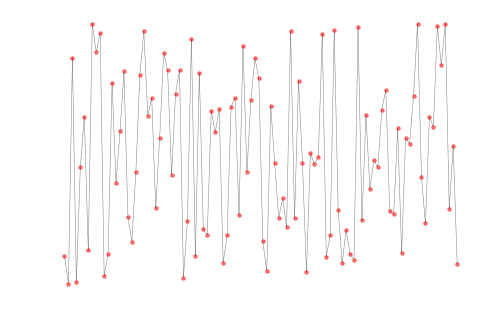

In [3]:
N = nx.path_graph(100)
pos = {}
for n in N.nodes():
    pos[n] = [n,2*random.random()-1]
Nbase = N.copy()
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)

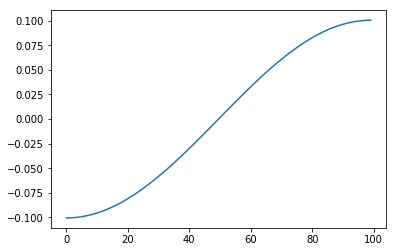

In [20]:
f = lgc.fiedler(lgc.GraphLocal().from_networkx(N))[0]
plt.plot(f)

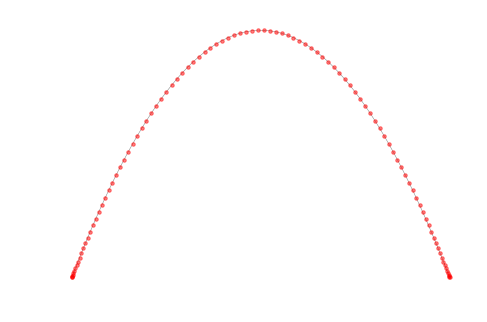

In [25]:
F = lgc.algorithms.eig2_nL(lgc.GraphLocal().from_networkx(N),dim=2)[0]
nx.draw(N,matrix2dict(F,N),node_size=12, width=0.5, alpha=0.5)

2


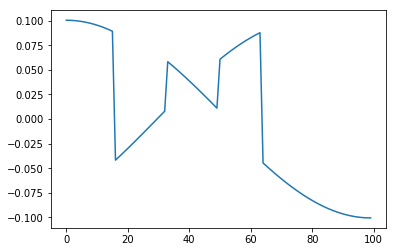

In [166]:
N = Nbase.copy()
print(nx.connected_double_edge_swap(N,5))
f = lgc.fiedler(lgc.GraphLocal().from_networkx(N))[0]
plt.plot(f)

There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 2 localmin nodes and they were filtered away by mindegree=5



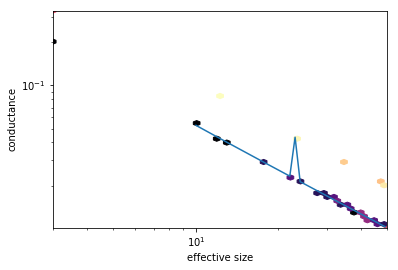

In [98]:
N = Nbase.copy()
ncpplot(N)

13
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 2 localmin nodes and they were filtered away by mindegree=5



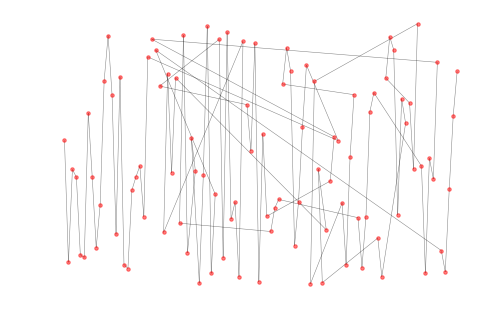

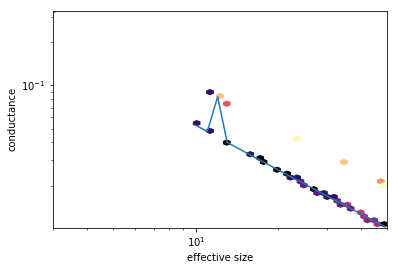

In [99]:
N = Nbase.copy()
print(nx.connected_double_edge_swap(N,25))
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
ncpplot(N)

### Essentially 1d graph with re-wiring

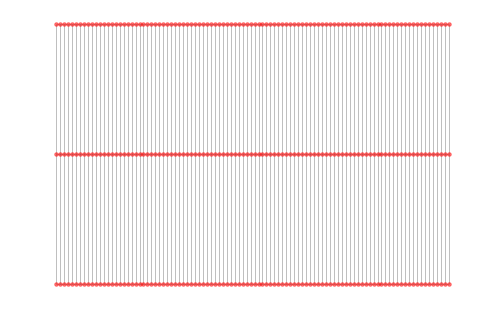

In [18]:
N = nx.grid_graph(dim=[3,100])
pos = {}
for n in N.nodes():
    pos[n] = list(n)
Nbase = N.copy()    
pos_orig = pos
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
nlist = list(N.nodes())

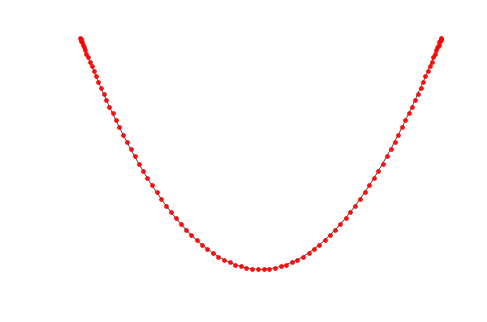

In [20]:
fiedler_view(Nbase.copy());

5


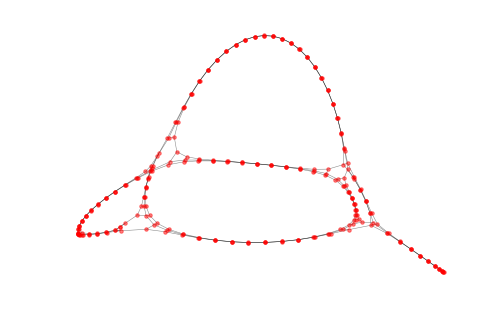

In [21]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,5))
fiedler_view(N);

15


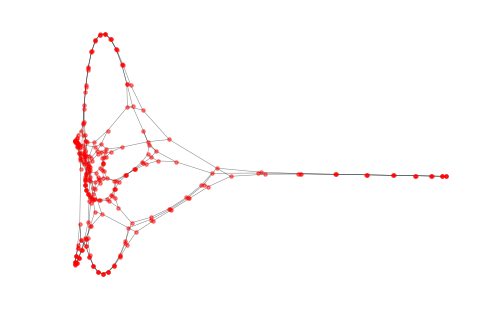

In [22]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,15))
fiedler_view(N);

25


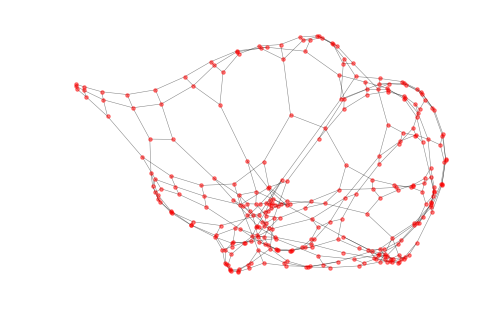

In [23]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,25))
fiedler_view(N);

50


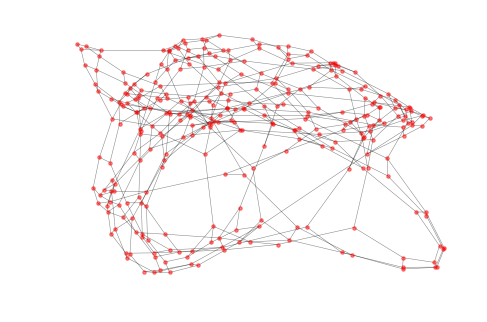

In [24]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,50))
fiedler_view(N);

There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 2 localmin nodes and they were filtered away by mindegree=5



5
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 5 localmin nodes and they were filtered away by mindegree=5



25
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 15 localmin nodes and they were filtered away by mindegree=5



49
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 21 localmin nodes and they were filtered away by mindegree=5



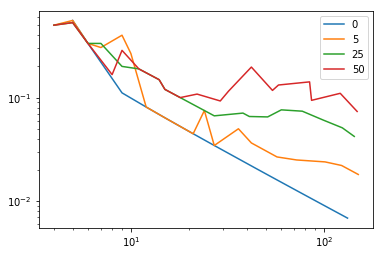

In [29]:
fig,ax = plt.subplots()

random.seed(0)
N = Nbase.copy()
ncpplotline(ax,N,"0")

N = Nbase.copy()
print(nx.connected_double_edge_swap(N,5))
ncpplotline(ax,N,"5")

N = Nbase.copy()
print(nx.connected_double_edge_swap(N,25))
ncpplotline(ax,N,"25")

N = Nbase.copy()
print(nx.connected_double_edge_swap(N,50))
ncpplotline(ax,N,"50")
ax.legend()

## 2d grid with a little bit of re-wiring...
This will work with no noise. 

There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:223: UserWarning:

There are no localmin nodes



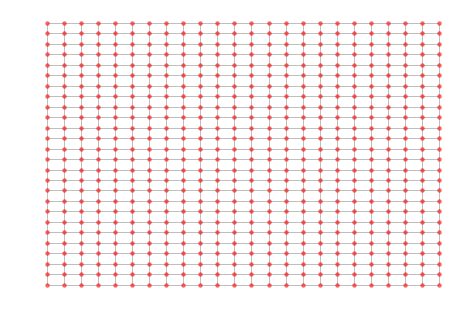

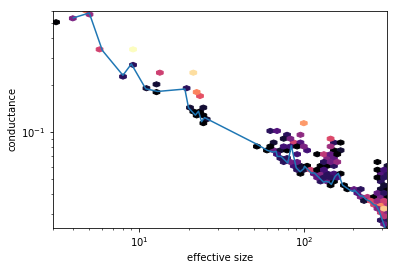

In [23]:
N = nx.grid_graph(dim=[26,24])
pos = {}
for n in N.nodes():
    pos[n] = list(n)
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
Nbase = N.copy()
ncp = ncpplot(N)

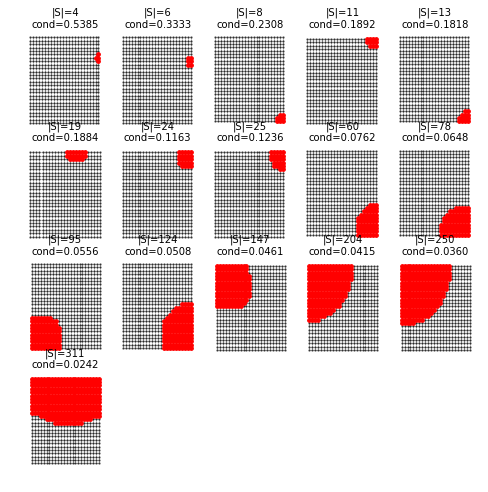

In [39]:
ncpsetview(N, pos, ncp=ncp);

(None, array([[-0.02672007,  0.01625343],
        [-0.01210988,  0.01952553],
        [-0.02516088,  0.01299335],
        ...,
        [ 0.00869955,  0.02782583],
        [-0.02866851, -0.01613492],
        [-0.0278081 ,  0.02185393]]))

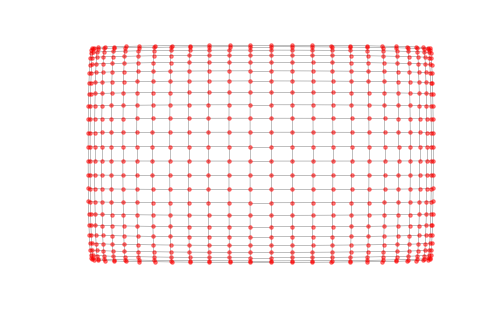

In [35]:
fiedler_view(N)

5
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:223: UserWarning:

There are no localmin nodes



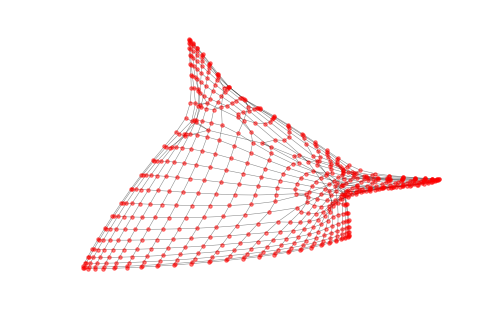

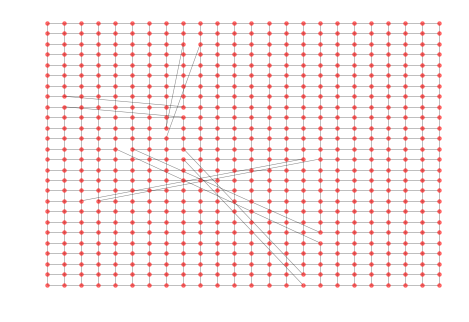

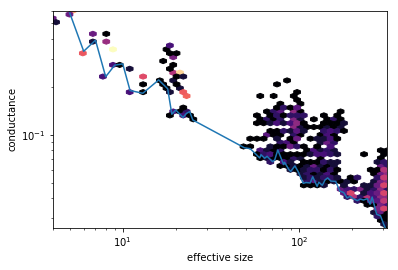

In [41]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,5))
fiedler_view(N)
plt.figure()
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
ncpplot(N)

20
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 1 localmin nodes and they were filtered away by mindegree=5



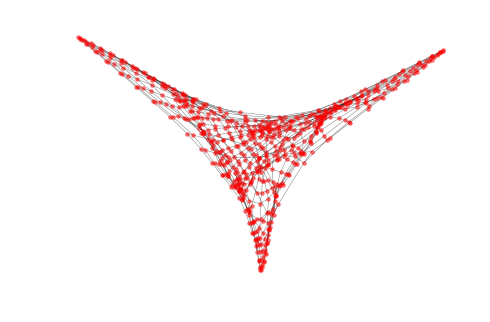

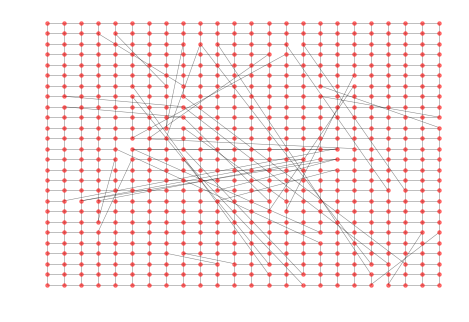

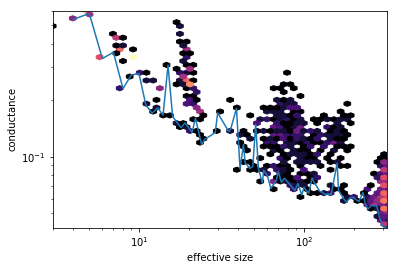

In [40]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,20))
fiedler_view(N)
plt.figure()
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
ncp = ncpplot(N)

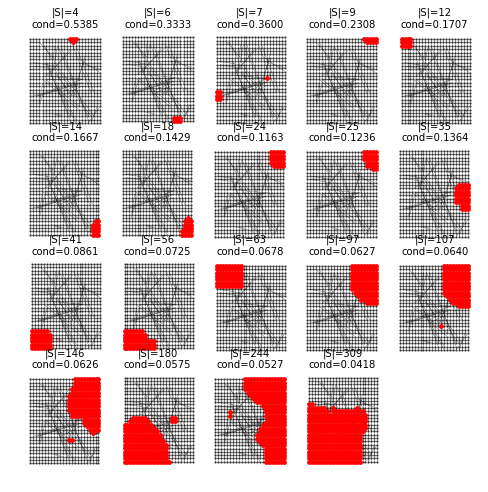

In [41]:
ncpsetview(N, pos, ncp=ncp);

0
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:223: UserWarning:

There are no localmin nodes



5
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:223: UserWarning:

There are no localmin nodes



25
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 1 localmin nodes and they were filtered away by mindegree=5



50
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 2 localmin nodes and they were filtered away by mindegree=5



98
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 5 localmin nodes and they were filtered away by mindegree=5



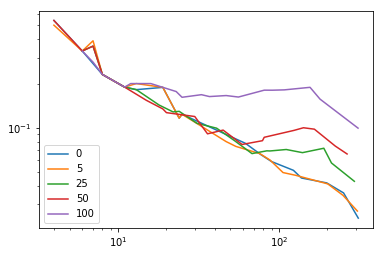

In [44]:
fig,ax = plt.subplots()

for nswaps in [0,5,25,50,100]:
    random.seed(0)
    N = Nbase.copy()
    print(nx.connected_double_edge_swap(N,nswaps))
    ncpplotline(ax,N,str(nswaps))

ax.legend()

## Look at these on a graph with latent 2d geometric structure

There are  1  connected components in the graph


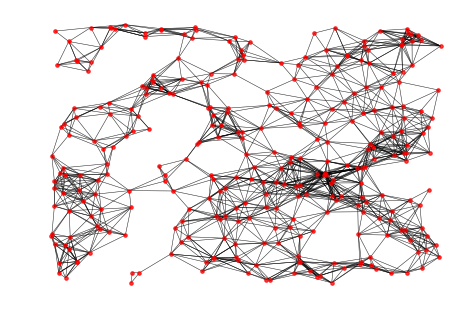

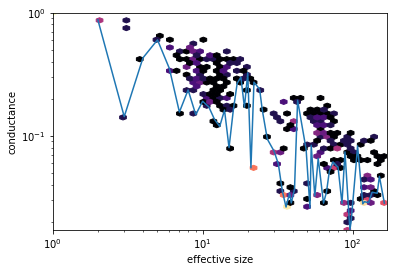

In [58]:
N = nx.random_geometric_graph(300, radius=2/math.sqrt(300), seed=0)
pos=nx.get_node_attributes(N,'pos')
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
Nbase = N.copy()
N = Nbase.copy()
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
ncp = ncpplot(N)

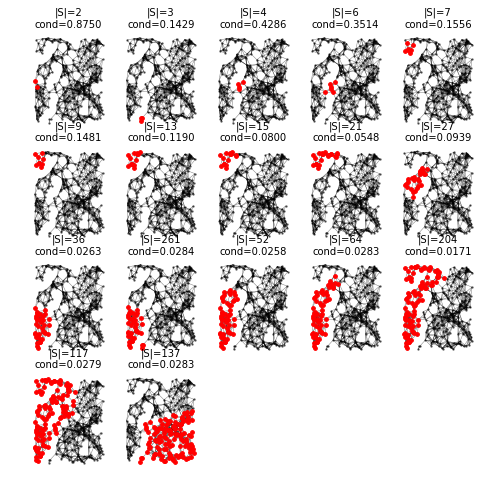

In [59]:
ncpsetview(N,pos,ncp=ncp);

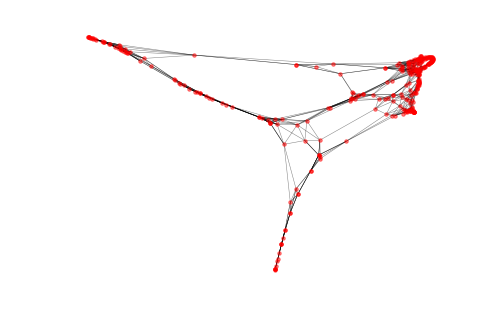

In [60]:
fiedler_view(N);

46
There are  1  connected components in the graph


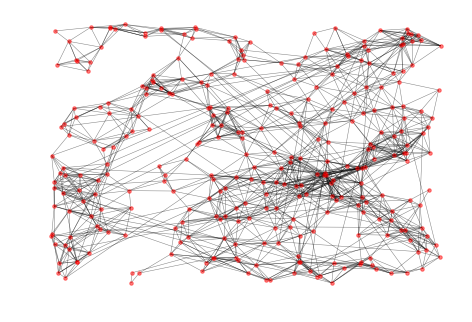

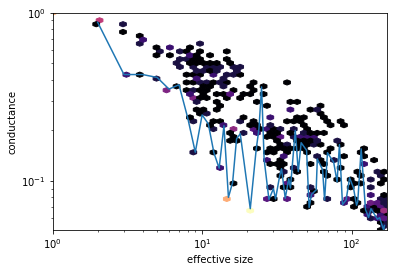

In [61]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,50))
nx.draw(N,pos,node_size=12, width=0.5, alpha=0.5)
ncp = ncpplot(N)

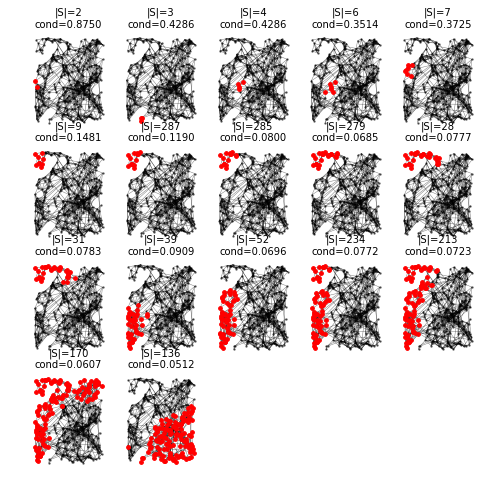

In [63]:
ncpsetview(N,pos,ncp=ncp);

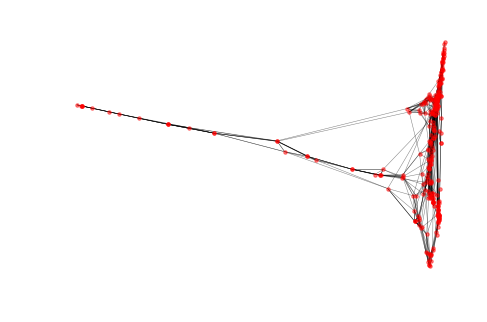

In [64]:
F = fiedler_view(N)

0
There are  1  connected components in the graph


5
There are  1  connected components in the graph


22
There are  1  connected components in the graph


46
There are  1  connected components in the graph


94
There are  1  connected components in the graph


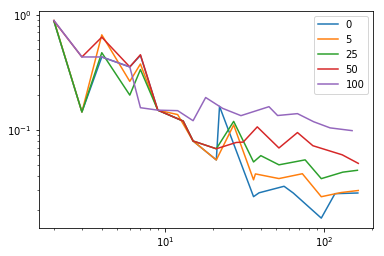

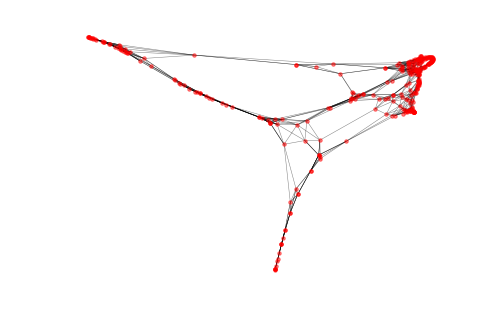

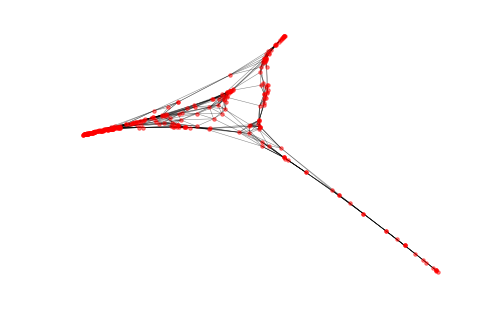

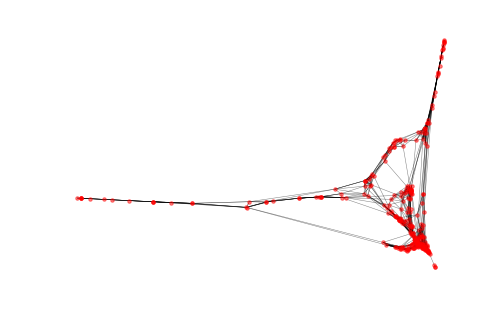

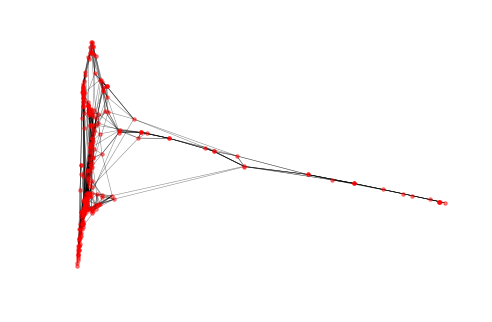

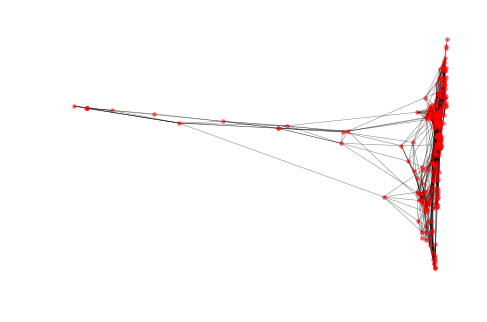

In [50]:
fig,ax = plt.subplots()

for nswaps in [0,5,25,50,100]:
    random.seed(0)
    N = Nbase.copy()
    print(nx.connected_double_edge_swap(N,nswaps))
    ncpplotline(ax,N,str(nswaps))
    plt.figure()
    fiedler_view(N)

ax.legend()

## The following need a little bit of extra help
We use a few more packages for 3d drawing and the swiss roll experiment

## 3d grid with a little bit of re-writing... 

#### Setup 3d plotting


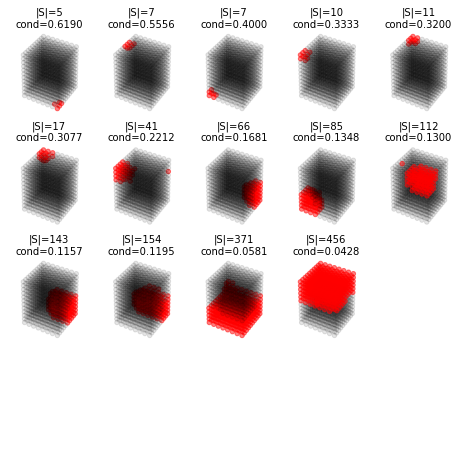

In [93]:
# From https://www.idtools.com.au/3d-network-graphs-python-mplot3d-toolkit/
from mpl_toolkits.mplot3d import Axes3D
def draw3d(G, pos, **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = [p[0] for v,p in pos.items()]
    ys = [p[1] for v,p in pos.items()]
    zs = [p[2] for v,p in pos.items()]
    ax.scatter(xs, ys, zs, alpha=0.5)
    
    for i,j in enumerate(G.edges()):
        x = np.array((pos[j[0]][0], pos[j[1]][0]))
        y = np.array((pos[j[0]][1], pos[j[1]][1]))
        z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
        ax.plot(x, y, z, c='black', alpha=0.5, linewidth=0.5)
        
    #ax.view_init(30, 0)
    ax.set_axis_off()
    return fig
    
def fiedler_view3(N):
    F = lgc.algorithms.eig2_nL(lgc.GraphLocal().from_networkx(N),dim=3)[0]
    return draw3d(N,matrix2dict(F,N)), F    

# This is still not done... 
def ncpsetview3(N, pos, ax=None,ncp=None,nbins=20,rholist=[1e-2,1e-3,1e-4]):
    
    assert(nbins == 20) # todo make this flexible
    
    fig = plt.figure(figsize=(8,8))
    axs = [ fig.add_subplot(4,5,i+1, projection='3d') for i in range(4*5)]

    
    # We need to be a bit hacky here because feature_by_group_min_line
    # assumes you are plotting. So if the ax=None, then we don't want
    # to plot the line at all, instead, what we do is just plot 
    # to the first set of axes that will get the graph eventually.
    # then we clear
    
    if ax is None:
        lineax = axs[0]
    else:
        lineax = ax
    if ncp is None:
        ncp = lgc.NCPData(lgc.GraphLocal().from_networkx(N)).approxPageRank(rholist=rholist)
        
    setdata = lgc.NCPPlots(ncp).feature_by_group_min_line(
            "output_cond","output_sizeeff", ax=lineax, label="", nbins=nbins)
    if ax is None: 
        lineax.clear()
    for ax in axs:
        ax.axis('off')
    
    # convert coordinates
    xs = [pos[v][0] for v in N.nodes()]
    ys = [pos[v][1] for v in N.nodes()]
    zs = [pos[v][2] for v in N.nodes()]
    
    for i,d in enumerate(setdata):
        
        S,cond = ncp.output_set(int(d[2])) # get the output set
        
        # for this we are going to use indices from 0 to N
        R = set(range(len(pos)))
        R -= set(S)
        # make sure we always look at the small size
        if len(R) < len(S):
            R, S = S, R # swap!
            
            
        axs[i].scatter([xs[v] for v in R], [ys[v] for v in R], [zs[v] for v in R], alpha=0.1, c='k')
        axs[i].scatter([xs[v] for v in S], [ys[v] for v in S], [zs[v] for v in S], alpha=0.5, c='r')
        
        
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], alpha=0.5, node_size=2, node_color='k', nodelist=list(R))
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], node_size=14, nodelist=list(SN), node_color='r')
        #nx.draw_networkx_edges(N, pos, ax=axs[i], alpha=0.5, width=0.5)
        axs[i].set_title('|S|=' + str(len(S)) + '\ncond=%.4f'%(d[1]),fontsize=10)
        axs[i].axis('tight')
    return fig


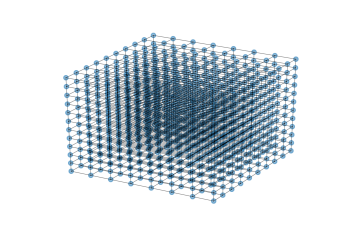

In [73]:
N = nx.grid_graph(dim=[12,10,8])
pos = {}
for n in N.nodes():
    pos[n] = list(n)
draw3d(N,pos)
Nbase = N.copy()

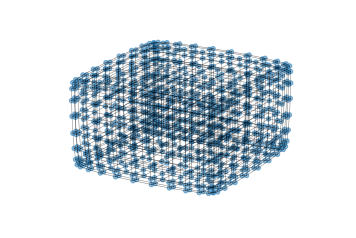

In [74]:
fiedler_view3(N);

There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 8 localmin nodes and they were filtered away by mindegree=5



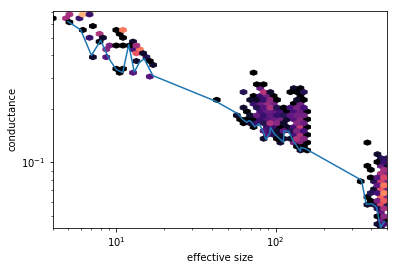

In [78]:
ncp = ncpplot(N);

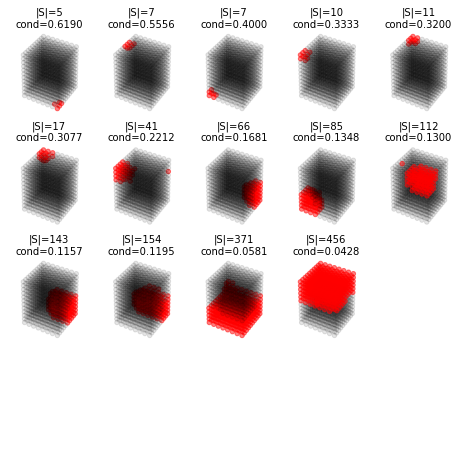

In [94]:
ncpsetview3(N, pos, ncp=ncp);

5
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 8 localmin nodes and they were filtered away by mindegree=5



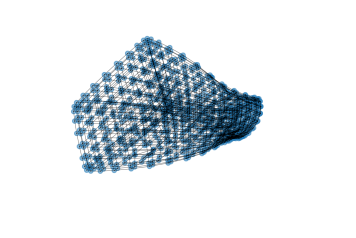

<Figure size 432x288 with 0 Axes>

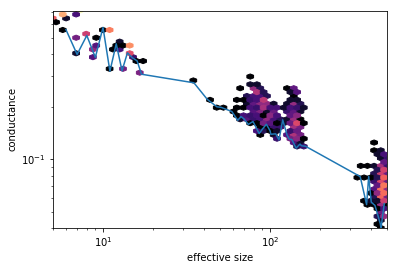

In [76]:
N = Nbase.copy()
random.seed(0)
print(nx.connected_double_edge_swap(N,5))
fiedler_view3(N)
plt.figure()
#draw3d(N,pos)
ncpplot(N);

0
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 8 localmin nodes and they were filtered away by mindegree=5



5
There are  1  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/ncp.py:229: UserWarning:

there are 8 localmin nodes and they were filtered away by mindegree=5



25
There are  1  connected components in the graph


50
There are  1  connected components in the graph


99
There are  1  connected components in the graph


199
There are  1  connected components in the graph


498
There are  1  connected components in the graph


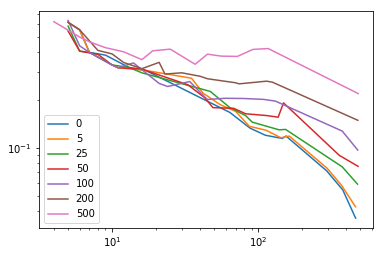

In [102]:
fig,ax = plt.subplots()

for nswaps in [0,5,25,50,100,200,500]:
    random.seed(0)
    N = Nbase.copy()
    print(nx.connected_double_edge_swap(N,nswaps))
    ncpplotline(ax,N,str(nswaps))

ax.legend()

## Swiss roll with noise

In [67]:
from sklearn.datasets import make_swiss_roll
n = 1000
coords3,mcoords =  make_swiss_roll(n_samples=n, noise=0.0, random_state=0)
pos = {i: coords3[i] for i in range(n) }
mcoords = {i: mcoords[i] for i in range(n) }
N = nx.random_geometric_graph(n, 3, pos=pos,  seed=0, dim=3)
Nbase = N.copy()
nx.is_connected(N)

True

In [68]:
fig = draw3d(N,pos)
fig.gca().view_init(30,110)

NameError: name 'draw3d' is not defined

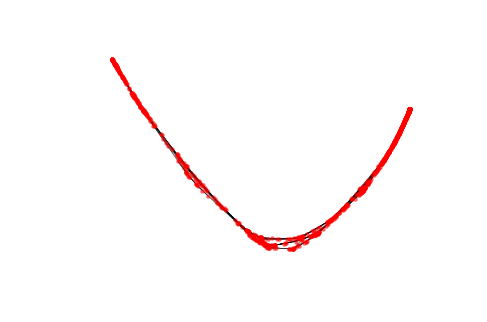

In [6]:
F = fiedler_view(N)[1];

There are  1  connected components in the graph


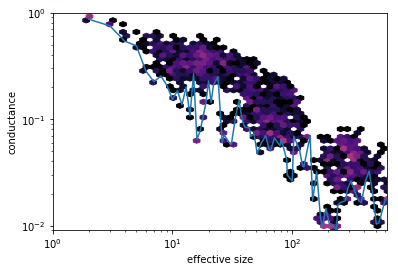

In [7]:
ncp = ncpplot(N)

In [66]:
ncpsetview(N, matrix2dict(N,F), ncp=ncp);
    

AttributeError: 'tuple' object has no attribute 'nodes'

### Add noise

True


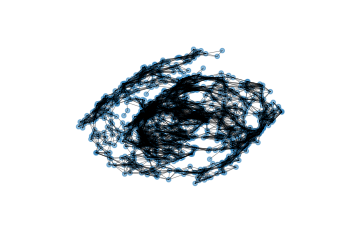

In [79]:
from sklearn.datasets import make_swiss_roll
n = 1000
coords3,mcoords =  make_swiss_roll(n_samples=n, noise=0.5, random_state=0)
pos = {i: coords3[i] for i in range(n) }
mcoords = {i: mcoords[i] for i in range(n) }
N = nx.random_geometric_graph(n, 3, pos=pos,  seed=0, dim=3)
Nbase = N.copy()
print(nx.is_connected(N))
fig = draw3d(N,pos)
fig.gca().view_init(30,110)

There are  1  connected components in the graph


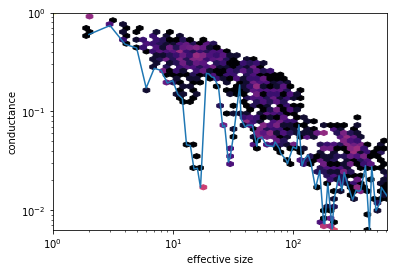

In [81]:
ncpplot(N)

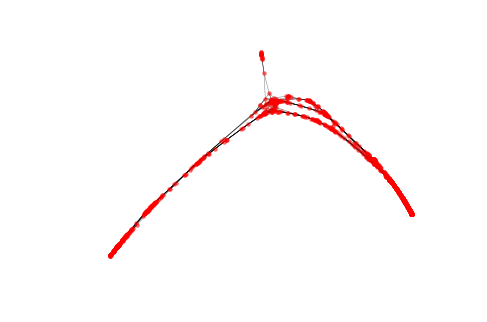

In [80]:
fiedler_view(N);

is_connected False


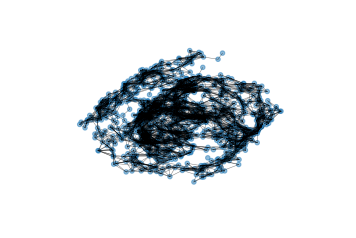

In [93]:
from sklearn.datasets import make_swiss_roll
n = 1000
coords3,mcoords =  make_swiss_roll(n_samples=n, noise=0.75, random_state=0)
pos = {i: coords3[i] for i in range(n) }
mcoords = {i: mcoords[i] for i in range(n) }
N = nx.random_geometric_graph(n, 3, pos=pos,  seed=0, dim=3)
Nbase = N.copy()
print("is_connected", nx.is_connected(N))
fig = draw3d(N,pos)
fig.gca().view_init(30,110)

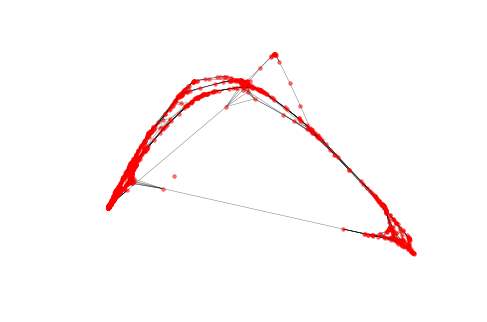

In [94]:
fiedler_view(N);

There are  1  connected components in the graph


There are  1  connected components in the graph


There are  1  connected components in the graph


There are  2  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:538: UserWarning:

The graph has multiple (2) components, using the largest with 999 / 1000 nodes



There are  6  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:538: UserWarning:

The graph has multiple (6) components, using the largest with 995 / 1000 nodes



There are  9  connected components in the graph


/u/subspace_s3/dgleich/land/land/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:538: UserWarning:

The graph has multiple (9) components, using the largest with 991 / 1000 nodes



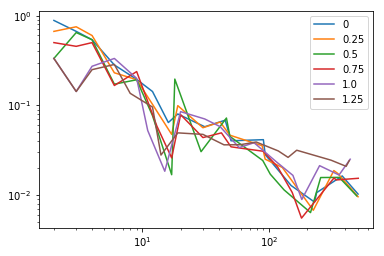

In [96]:
n = 1000

fig,ax = plt.subplots()

for noise in [0,0.25,0.5,0.75,1.0,1.25]:
    random.seed(0)
    coords3,mcoords =  make_swiss_roll(n_samples=n, noise=noise, random_state=0)
    pos = {i: coords3[i] for i in range(n) }
    N = nx.random_geometric_graph(n, 3, pos=pos,  seed=0, dim=3)
    ncpplotline(ax,N,str(noise))

ax.legend()





In [ ]:
# View the NCP sets on the swiss roll

n = 1000

fig,ax = plt.subplots()

for noise in [0,0.25,0.5,0.75,1.0,1.25]:
    random.seed(0)
    coords3,mcoords =  make_swiss_roll(n_samples=n, noise=noise, random_state=0)
    pos = {i: coords3[i] for i in range(n) }
    N = nx.random_geometric_graph(n, 3, pos=pos,  seed=0, dim=3)
    

ax.legend()



